In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import linear_model
import warnings

import time
from sklearn.feature_extraction import DictVectorizer
from scipy import sparse
import pickle

warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
from datetime import datetime

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

%matplotlib inline
t = time.time()


In [2]:
X=np.load('./mostrecentinput/nxtrain_standard_original0.npy')
X1= np.load('./mostrecentinput/nxtrain_standard_derived0.npy')
X2=pd.read_pickle("./mostrecentinput/time_series_derived_standard_train2.dat")
X3=pd.read_pickle("./mostrecentinput/time_series_original_standard_train2.dat")
X=np.hstack((X,X1,X2,X3))

y=pickle.load(open("./mostrecentinput/ytrain2.dat","rb"))

Fitting estimator with 1503 features.
Fitting estimator with 1403 features.
Fitting estimator with 1303 features.
Fitting estimator with 1203 features.
Fitting estimator with 1103 features.
Fitting estimator with 1003 features.
Fitting estimator with 903 features.
Fitting estimator with 803 features.
Fitting estimator with 703 features.
Fitting estimator with 603 features.
Fitting estimator with 503 features.
Fitting estimator with 403 features.
Fitting estimator with 303 features.
Fitting estimator with 203 features.
Fitting estimator with 103 features.
Fitting estimator with 3 features.
Finished fold with 1 / 17 feature ranks, score=0.586859
Finished fold with 2 / 17 feature ranks, score=0.596313
Finished fold with 3 / 17 feature ranks, score=0.668843
Finished fold with 4 / 17 feature ranks, score=0.665098
Finished fold with 5 / 17 feature ranks, score=0.691556
Finished fold with 6 / 17 feature ranks, score=0.675273
Finished fold with 7 / 17 feature ranks, score=0.659318
Finished fol

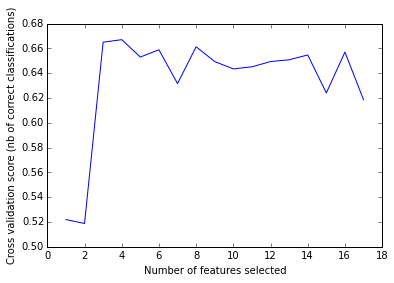

In [3]:
clf = linear_model.SGDClassifier()
selector = RFECV(estimator=clf, step=100, cv=StratifiedKFold(y, 10),
              scoring='roc_auc',verbose=2)

selector1 = selector.fit(X, y)

Xselect=X[:,selector1.support_]

clf = linear_model.SGDClassifier()
skf = cross_validation.StratifiedKFold(y, n_folds=5) # K-fold cv splitting

for train0, cv0 in skf:
    train, cv = train0, cv0
    break

niter=100
preds=0
ncount=0
for i in range(niter):
    MODEL = clf.fit(Xselect[train,:], y[train])
    pred0=MODEL.predict(Xselect[cv,:])
    preds=preds+pred0
    ncount+=1
        
preds=preds/float(ncount)
AUC1=metrics.roc_auc_score(y[cv], preds)


str1=time.strftime("%b%d%Y%H%M%S", time.localtime())
filename='SDGSVM_'  +  str1 + '_AUC_' + str(AUC1) + '.p'
np.arange(X.shape[1])[selector1.support_].dump(filename)

# Plotting
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector1.grid_scores_) + 1), selector1.grid_scores_)
plt.show()
print(AUC1)
elapsed = (time.time() - t)/60
print(elapsed)
